In [ ]:
# Step 1 Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import os
# Deep learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Data loading
from sklearn.model_selection import train_test_split
# Image preprocessing (if needed later)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy.io
import pandas as pd



In [ ]:
#  Step 2 Load train and test CSV files
train_df = pd.read_csv("emnist-mnist-train.csv")
test_df = pd.read_csv("emnist-mnist-test.csv")
# Separate labels and images
train_labels = train_df.iloc[:, 0].values
train_images = train_df.iloc[:, 1:].values
test_labels = test_df.iloc[:, 0].values
test_images = test_df.iloc[:, 1:].values



In [ ]:
# Step 3 PreProcess the Data
# Normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape to 28x28
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1, 28, 28))

# Transpose to correct rotation
train_images = np.transpose(train_images, (0, 2, 1))
test_images = np.transpose(test_images, (0, 2, 1))

# Add channel dimension
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# One-hot encode labels (subtract 1 to get labels from 0 to 25)
train_labels = to_categorical(train_labels - 1, num_classes=26)
test_labels = to_categorical(test_labels - 1, num_classes=26)


In [ ]:
#  Step 4 Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')  # 26 output classes for A-Z
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary (optional, for your reference)
model.summary()


c:\Users\Shashwat Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5 Define x and y
# Features (images)
X_train = train_images
X_test = test_images
# Labels (one-hot encoded)
y_train = train_labels
y_test = test_labels


In [30]:
# Step 6 Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,                # You can increase this later (e.g., 20–30 for better results)
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7708 - loss: 0.7354 - val_accuracy: 0.9776 - val_loss: 0.0686
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9698 - loss: 0.1024 - val_accuracy: 0.9861 - val_loss: 0.0408
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9791 - loss: 0.0710 - val_accuracy: 0.9890 - val_loss: 0.0343
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9818 - loss: 0.0623 - val_accuracy: 0.9904 - val_loss: 0.0311
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9848 - loss: 0.0496 - val_accuracy: 0.9903 - val_loss: 0.0272
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9869 - loss: 0.0450 - val_accuracy: 0.9906 - val_loss: 0.0279
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9875 - loss: 0.0433 - val_accuracy: 0.9922 - val_loss: 0.0238
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9900 - loss: 0.0333 - val_accu

In [31]:
#  Step 7 Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.9934 - loss: 0.0191

Test Accuracy: 99.34%
Test Loss: 0.0191


In [32]:
# Step 8  Predict probabilities for test data
y_pred_probs = model.predict(X_test)
# Convert probabilities to class indices (0 to 25)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


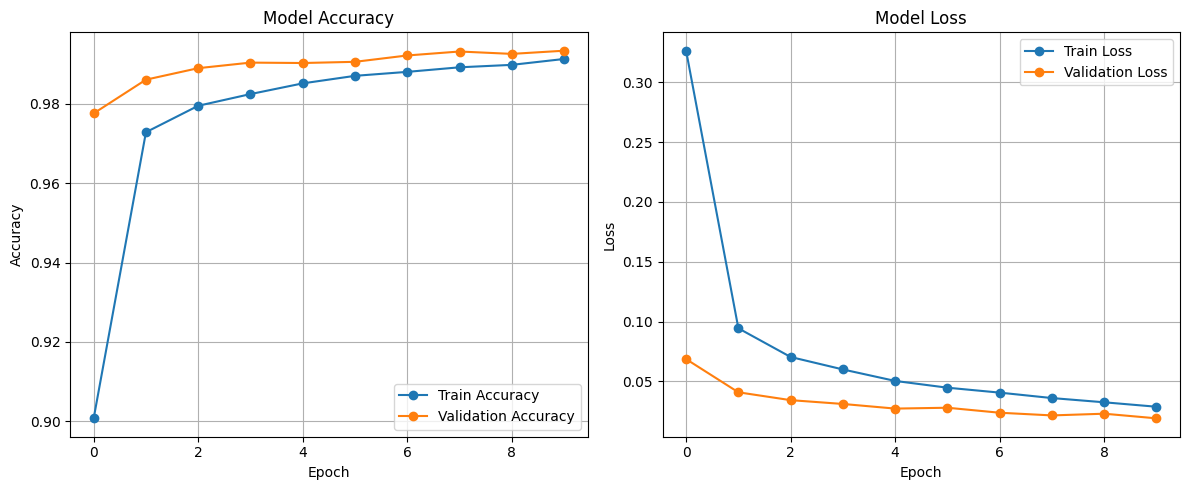

In [35]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


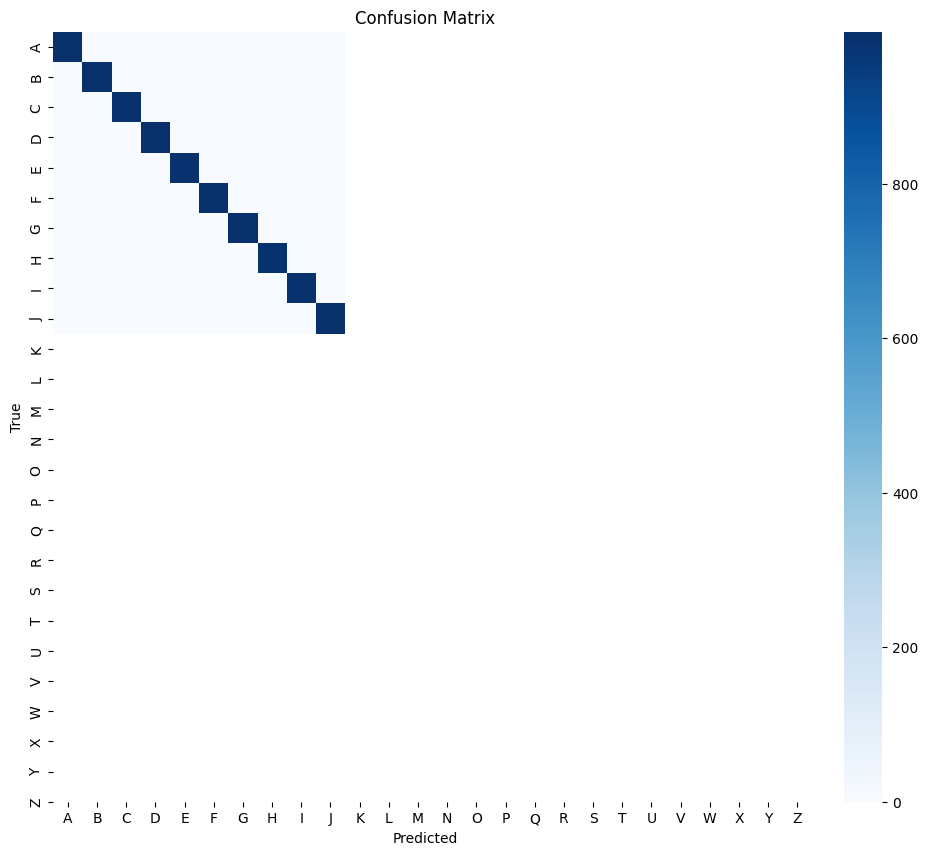

In [37]:
# Step 10 Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), yticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
# Step 11 Save the Model
model.save("emnist_cnn_model.keras")

In [40]:
from tensorflow.keras.models import load_model
model = load_model("emnist_cnn_model.keras")

c:\Users\Shashwat Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
# Load trained CNN model
model = load_model("emnist_cnn_model.h5")
# Mapping index to A–Z characters
index_to_char = {i: chr(65 + i) for i in range(26)}
# Create white canvas
canvas = np.ones((280, 280), dtype='uint8') * 255
drawing = False
ix, iy = -1, -1
# Mouse callback to draw
def draw(event, x, y, flags, param):
    global drawing, ix, iy
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.line(canvas, (ix, iy), (x, y), 0, thickness=15)
        ix, iy = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
# Setup OpenCV window
cv2.namedWindow("Draw a Character (p=Predict, c=Clear, q=Quit)")
cv2.setMouseCallback("Draw a Character (p=Predict, c=Clear, q=Quit)", draw)
while True:
    cv2.imshow("Draw a Character (p=Predict, c=Clear, q=Quit)", canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('p'):  # Predict
        coords = cv2.findNonZero(255 - canvas)
        if coords is None:
            print("Draw something first!")
            continue

        # Crop drawn region
        x, y, w, h = cv2.boundingRect(coords)
        char_img = canvas[y:y+h, x:x+w]

        # Resize to fit 20x20 box
        if w > h:
            new_w = 20
            new_h = int(h * (20.0 / w))
        else:
            new_h = 20
            new_w = int(w * (20.0 / h))

        char_img = cv2.resize(char_img, (new_w, new_h), interpolation=cv2.INTER_AREA)

        # Pad to 28x28
        top_pad = (28 - new_h) // 2
        bottom_pad = 28 - new_h - top_pad
        left_pad = (28 - new_w) // 2
        right_pad = 28 - new_w - left_pad
        char_img = np.pad(char_img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant', constant_values=255)

        # Preprocess: invert, transpose, normalize
        char_img = 255 - char_img
        char_img = np.transpose(char_img)
        char_img = char_img.astype('float32') / 255.0
        char_img = char_img.reshape(1, 28, 28, 1)

        # Predict with CNN
        pred = model.predict(char_img)
        predicted_index = np.argmax(pred)
        predicted_char = index_to_char[predicted_index]
        print(f"✅ Predicted Character: {predicted_char}")

    elif key == ord('c'):
        canvas[:] = 255  # clear canvas
        print("🧼 Canvas cleared.")

    elif key == ord('q'):
        print("👋 Exiting.")
        break

cv2.destroyAllWindows()

